<a href="https://colab.research.google.com/github/rag09reddy/Digit_classification/blob/main/Digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid

from tensorflow.keras.utils import to_categorical


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Kaggle/train.csv")
test  = pd.read_csv("/content/drive/MyDrive/Kaggle/test.csv")


In [ ]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


Here we are assigin the results as Y_train. As the results in the csv file are named under the column "label"

Next in the Y_train we are droping that single label column. "axis = 1" shows that we are droping the column. "if axis = 0" then we are dropping the row

In [ ]:
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1)

In [ ]:
print(Y_train)
print(X_train)

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64
       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995       0       0       0       0       0       0       0       0       0   
41996       0       0       0       0       0       0       0       0       0   
41997       0       0       0       0       0       0       0       0       0   
41998       0       0       

In [ ]:
del train

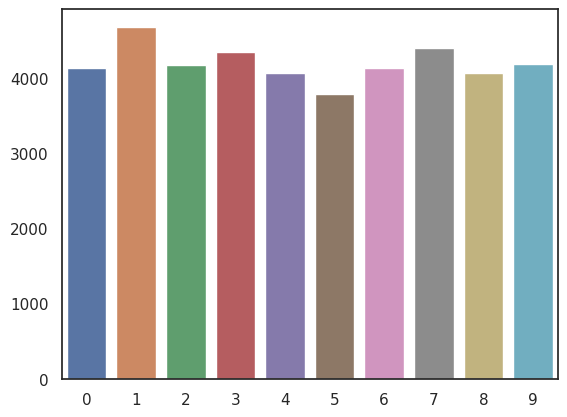

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [ ]:
sns.set(style='white', context='notebook', palette='deep')

value_counts = Y_train.value_counts()
g = sns.barplot(x=value_counts.index, y=value_counts.values)
plt.show()
value_counts

In [ ]:
X_train.isnull().any().describe()


count       784
unique        1
top       False
freq        784
dtype: object

In [ ]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

Nrmalizing the Data now the pixel value can range between 0 to 255, but after normalization it will be between 0 and 1

In [ ]:
X_train = X_train/255.0
test = test/255.0

Now the Data is in the form of 1D array, i.e it has total 42000 Images and the each Image is us a single row which has 784 columns, which represent its pixel values, So we are reshapping it into 3D vector, (-1, 28, 28, 1).

-1 = This represnts we are keeping the number of rows same i.e we are not altering it
28 x 28 = Each Image that pixel size
1 = For grey channels we use 1, if it was RGB we use 3

Label Encoding to one hot Vector (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
                                 (ex : 3 -> [0,0,0,1,0,0,0,0,0,0])

Here I will be using the Normal Neuarl network to solve the problem first as shown in the second exercise of the ML class

In [ ]:
tf.random.set_seed(1234)

In [ ]:
model = Sequential(
    [
        tf.keras.layers.InputLayer((784,)),
        tf.keras.layers.Dense(10005, activation="relu", name="L1"),
        tf.keras.layers.Dense(5500, activation="relu", name="L2"),
        tf.keras.layers.Dense(10, activation="linear", name="L3")
    ], name = "normal_model"
)

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

In [ ]:
model.summary()

Model: "normal_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 10005)             7853925   
                                                                 
 L2 (Dense)                  (None, 5500)              55033000  
                                                                 
 L3 (Dense)                  (None, 10)                55010     
                                                                 
Total params: 62941935 (240.10 MB)
Trainable params: 62941935 (240.10 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
[layer1, layer2, layer3] = model.layers

In [ ]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W2,b2 = layer3.get_weights()




In [ ]:
from keras.src.engine.training import optimizer
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(X_train,Y_train,epochs=20)

Epoch 1/20
 898/1313 [===================>..........] - ETA: 7:21 - loss: 0.2700

KeyboardInterrupt: ignored

Prediction using Softmax

In [ ]:
prediction = model.predict(test)
prediction_P_normal_model = tf.nn.softmax(prediction)




875/875 [==============================] - 1s 2ms/step


In [ ]:
prediction_P_normal_model = np.argmax(prediction_P_normal_model, axis = 1)
prediction_P_normal_model = pd.Series(prediction_P_normal_model, name = "Label")

Submission

In [ ]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),prediction_P_normal_model],axis = 1)
file_path = '/content/drive/MyDrive/Kaggle/prediction_normal_model_2.csv'

submission.to_csv(file_path,index=False)



In [ ]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [ ]:
Y_train = to_categorical(Y_train, num_classes = 10)
